In [12]:
import helper
import os
import glob
import cv2
import random
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(700, 1121, 3)


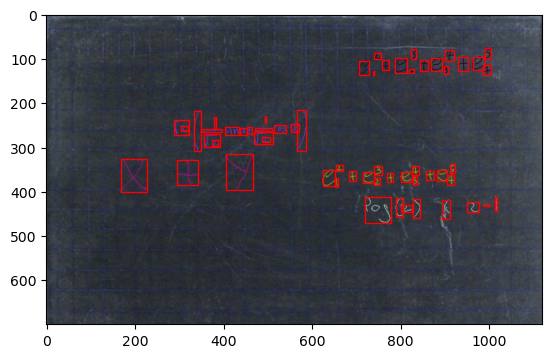

(700, 1089, 3)


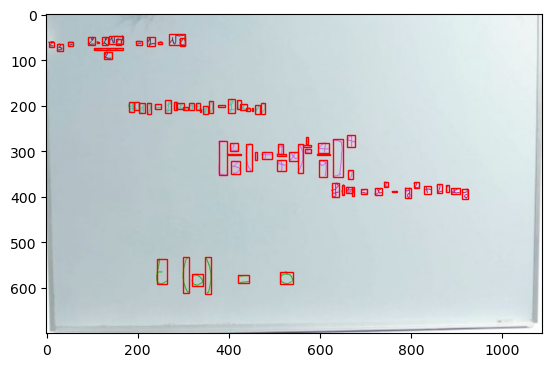

(700, 1084, 3)


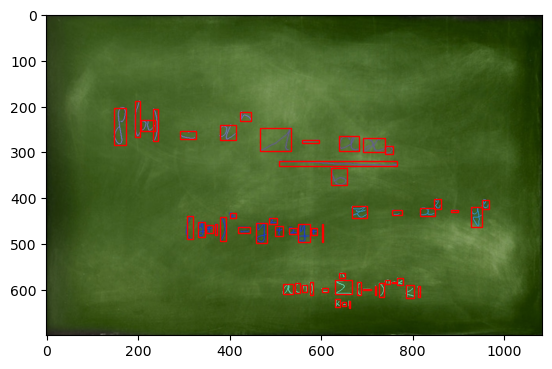

(700, 1084, 3)


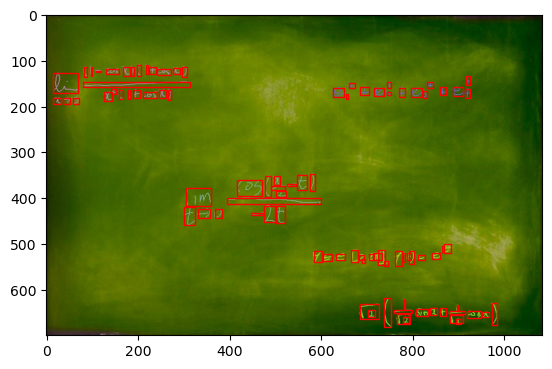

(700, 1095, 3)


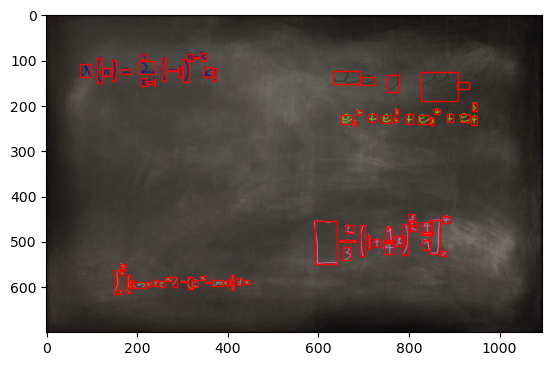

In [17]:
dataset_num = 5
path = 'archive' + os.sep + 'dataset' + str(dataset_num)+ os.sep
file = open(path + "label.txt", 'r')
for i in range(dataset_num):
    back = cv2.imread(path + str(i) + ".jpg")
    bboxes = file.readline().split('.jpg ')[1].split(' ')
    for i, bbox in enumerate(bboxes):
        if '\n' in bbox:
            continue
        co = bbox.split(',')
        x1 = int(co[0])
        y1 = int(co[1])
        x2 = int(co[2])
        if co[3][-2:-1] == '\n':
            y2 = int(co[3][:-1])
        else:
            y2 = int(co[3])
        plt.gca().add_patch(Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')) 

    print(back.shape)
    plt.imshow(back)
    plt.show()
file.close()
